# Timing test

In [1]:
import numpy as np
import mne

In [25]:
# Load raw data and event information
raw = mne.io.read_raw_brainvision('../../data/raw/timing_test_2.vhdr')
events, event_ids = mne.events_from_annotations(raw)
print(event_ids)

Extracting parameters from ../../data/raw/timing_test_2.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S  3']
{'New Segment/': 99999, 'Stimulus/S  1': 1, 'Stimulus/S  2': 2, 'Stimulus/S  3': 3}


/tmp/ipykernel_13968/960770699.py:2: RuntimeWarning: No coordinate information found for channels ['leog', 'reog', 'Aux']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision('../../data/raw/timing_test_2.vhdr')
/tmp/ipykernel_13968/960770699.py:2: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision('../../data/raw/timing_test_2.vhdr')
/tmp/ipykernel_13968/960770699.py:2: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['leog', 'reog', 'Aux']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision('../../data/raw/timing_test_2.vhdr')


In [27]:
# Try to adjust times
events[:, 0] = events[:, 0] + 1000

Not setting metadata
331 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
322 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
347 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 331 events and 5001 original time points ...
0 bad epochs dropped
Not setting metadata
331 matching events found
No baseline correction applied
0 projection items activated


/tmp/ipykernel_13968/1971924386.py:15: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_1.plot_image(picks = 'Aux')


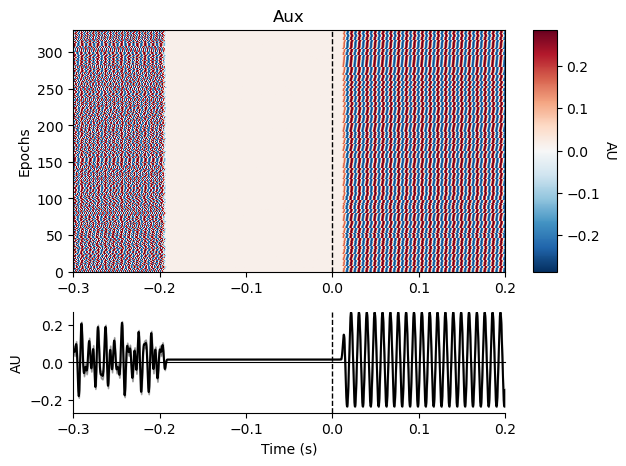

Loading data for 322 events and 5001 original time points ...
0 bad epochs dropped
Not setting metadata
322 matching events found
No baseline correction applied
0 projection items activated


/tmp/ipykernel_13968/1971924386.py:16: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_2.plot_image(picks = 'Aux')


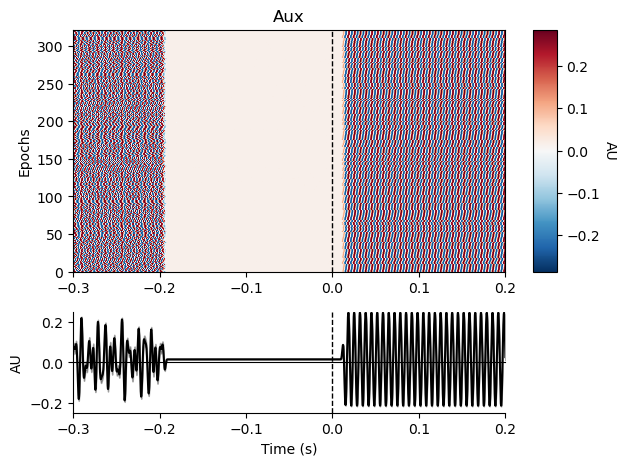

Loading data for 347 events and 5001 original time points ...
0 bad epochs dropped
Not setting metadata
347 matching events found
No baseline correction applied
0 projection items activated


/tmp/ipykernel_13968/1971924386.py:17: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_3.plot_image(picks = 'Aux')


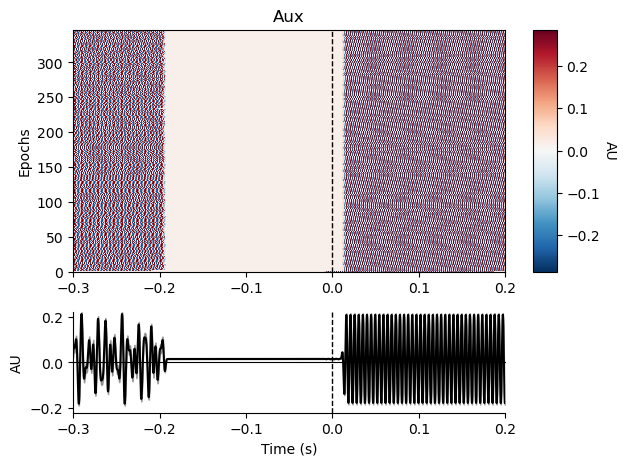

[<Figure size 640x480 with 3 Axes>]

In [28]:
# Subset events by stim
ttl_idx_1 = (events[:,2] == event_ids['Stimulus/S  1']) # true if event code matches selection
ttl_pulses_1 = events[ttl_idx_1, :] # choose just events for which ttl_idx is true
ttl_idx_2 = (events[:,2] == event_ids['Stimulus/S  2']) # true if event code matches selection
ttl_pulses_2 = events[ttl_idx_2, :] # choose just events for which ttl_idx is true
ttl_idx_3 = (events[:,2] == event_ids['Stimulus/S  3']) # true if event code matches selection
ttl_pulses_3 = events[ttl_idx_3, :] # choose just events for which ttl_idx is true

# Epoch them
epochs_1 = mne.Epochs(raw, ttl_pulses_1, tmin = -0.3, tmax = .2, baseline = (-.3, 0.))
epochs_2 = mne.Epochs(raw, ttl_pulses_2, tmin = -0.3, tmax = .2, baseline = (-.3, 0.))
epochs_3 = mne.Epochs(raw, ttl_pulses_3, tmin = -0.3, tmax = .2, baseline = (-.3, 0.))

# Plot each stim
epochs_1.plot_image(picks = 'Aux')
epochs_2.plot_image(picks = 'Aux')
epochs_3.plot_image(picks = 'Aux')

In [22]:
# Compute some info for stim 1
data = epochs_1.get_data(picks = 'Aux') # just the audio channel
data = np.squeeze(data) # remove extraneous dim
thres = np.quantile(data, .95) # select threshold for stim start
latencies = [] # sound onset time - time of TTL trigger
above_thres = (data > thres) # true where data is above threshold
for trial in range(data.shape[0]):
    idx = np.argwhere(above_thres[trial, :])[0] # first index where crosses threshold
    delta = idx/epochs_1.info['sfreq'] + epochs_1.tmin # convert to time relative to trigger
    latencies.append(delta)
    
# Get offset between TTL pulse and stim
offset = np.mean(latencies)
print(offset * 1e3) # in milliseconds

# Get the jitter between TTL pulse and stim
jitter = np.std(latencies)
print(jitter * 1e3) # in milliseconds

Loading data for 331 events and 5001 original time points ...
-297.997583081571
1.4382958891861304


In [23]:
# Compute some info for stim 2
data = epochs_2.get_data(picks = 'Aux') # just the audio channel
data = np.squeeze(data) # remove extraneous dim
thres = np.quantile(data, .95) # select threshold for stim start
latencies = [] # sound onset time - time of TTL trigger
above_thres = (data > thres) # true where data is above threshold
for trial in range(data.shape[0]):
    idx = np.argwhere(above_thres[trial, :])[0] # first index where crosses threshold
    delta = idx/epochs_2.info['sfreq'] + epochs_2.tmin # convert to time relative to trigger
    latencies.append(delta)
    
# Get offset between TTL pulse and stim
offset = np.mean(latencies)
print(offset * 1e3) # in milliseconds

# Get the jitter between TTL pulse and stim
jitter = np.std(latencies)
print(jitter * 1e3) # in milliseconds

Loading data for 322 events and 5001 original time points ...
-298.0357142857143
1.4276977141845713


In [6]:
# Compute some info for stim 3
data = epochs_3.get_data(picks = 'Aux1') # just the audio channel
data = np.squeeze(data) # remove extraneous dim
thres = np.quantile(data, .95) # select threshold for stim start
latencies = [] # sound onset time - time of TTL trigger
above_thres = (data > thres) # true where data is above threshold
for trial in range(data.shape[0]):
    idx = np.argwhere(above_thres[trial, :])[0] # first index where crosses threshold
    delta = idx/epochs_3.info['sfreq'] + epochs_3.tmin # convert to time relative to trigger
    latencies.append(delta)
    
# Get offset between TTL pulse and stim
offset = np.mean(latencies)
print(offset * 1e3) # in milliseconds

# Get the jitter between TTL pulse and stim
jitter = np.std(latencies)
print(jitter * 1e3) # in milliseconds

Loading data for 496 events and 1501 original time points ...
26.836693548387096
0.695046090110382
